In [1]:
cat ~/.netrc | grep 'urs.earthdata.nasa.gov' | wc -l

1


**Now you should be able to use the aws cli from Jupyter.** 

(Note that IPython environment variables behave like they do in the shell, for the most part.)

In [2]:
# x = "https://opendap.earthdata.nasa.gov/collections/C1968980576-POCLOUD/granules/S6A_P4_2__LR_RED__NR_025_001_20210713T162644_20210713T182234_F02.dap"
# print(x)

In [3]:
import os
import s3fs
import requests
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [4]:
import os
import s3fs
import requests
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

def begin_s3_direct_access(url: str="https://archive.podaac.earthdata.nasa.gov/s3credentials"):
    response = requests.get(url).json()
    return s3fs.S3FileSystem(key=response['accessKeyId'],
                             secret=response['secretAccessKey'],
                             token=response['sessionToken'],
                             client_kwargs={'region_name':'us-west-2'})

fs = begin_s3_direct_access()

type(fs)

s3fs.core.S3FileSystem

In [5]:
ShortName = "SWOT_SIMULATED_L2_KARIN_SSH_ECCO_LLC4320_CALVAL_V1"

ssh_Files = fs.glob(os.path.join("podaac-ops-cumulus-protected/", ShortName, "SWOT_L2_LR_SSH_Expert_001_*.nc"))

len(ssh_Files)

28

In [6]:
ssh_Files

['podaac-ops-cumulus-protected/SWOT_SIMULATED_L2_KARIN_SSH_ECCO_LLC4320_CALVAL_V1/SWOT_L2_LR_SSH_Expert_001_001_20111113T000000_20111113T005105_DG10_01.nc',
 'podaac-ops-cumulus-protected/SWOT_SIMULATED_L2_KARIN_SSH_ECCO_LLC4320_CALVAL_V1/SWOT_L2_LR_SSH_Expert_001_002_20111113T005105_20111113T014211_DG10_01.nc',
 'podaac-ops-cumulus-protected/SWOT_SIMULATED_L2_KARIN_SSH_ECCO_LLC4320_CALVAL_V1/SWOT_L2_LR_SSH_Expert_001_003_20111113T014211_20111113T023317_DG10_01.nc',
 'podaac-ops-cumulus-protected/SWOT_SIMULATED_L2_KARIN_SSH_ECCO_LLC4320_CALVAL_V1/SWOT_L2_LR_SSH_Expert_001_004_20111113T023317_20111113T032423_DG10_01.nc',
 'podaac-ops-cumulus-protected/SWOT_SIMULATED_L2_KARIN_SSH_ECCO_LLC4320_CALVAL_V1/SWOT_L2_LR_SSH_Expert_001_005_20111113T032423_20111113T041529_DG10_01.nc',
 'podaac-ops-cumulus-protected/SWOT_SIMULATED_L2_KARIN_SSH_ECCO_LLC4320_CALVAL_V1/SWOT_L2_LR_SSH_Expert_001_006_20111113T041529_20111113T050634_DG10_01.nc',
 'podaac-ops-cumulus-protected/SWOT_SIMULATED_L2_KARIN_SSH

In [7]:
ssh_Dataset = xr.open_mfdataset(
    paths=[fs.open(f) for f in ssh_Files],
    engine="h5netcdf",
    combine="nested",
    concat_dim="num_lines",
    mask_and_scale=True,
    decode_cf=True,
    data_vars=["simulated_true_ssh_karin"],
)

print(ssh_Dataset.simulated_true_ssh_karin)

<xarray.DataArray 'simulated_true_ssh_karin' (num_lines: 276276, num_pixels: 71)>
dask.array<concatenate, shape=(276276, 71), dtype=float64, chunksize=(9868, 71), chunktype=numpy.ndarray>
Coordinates:
    latitude         (num_lines, num_pixels) float64 dask.array<chunksize=(9868, 71), meta=np.ndarray>
    longitude        (num_lines, num_pixels) float64 dask.array<chunksize=(9868, 71), meta=np.ndarray>
    latitude_nadir   (num_lines) float64 dask.array<chunksize=(9868,), meta=np.ndarray>
    longitude_nadir  (num_lines) float64 dask.array<chunksize=(9868,), meta=np.ndarray>
Dimensions without coordinates: num_lines, num_pixels
Attributes:
    long_name:      sea surface height
    standard_name:  sea surface height above reference ellipsoid
    units:          m
    valid_min:      [-15000000]
    valid_max:      [150000000]
    comment:        Height of the sea surface free of measurement errors.


In [8]:
sla = ssh_Dataset['simulated_true_ssh_karin']
lat = ssh_Dataset['latitude']
lon = ssh_Dataset['longitude']

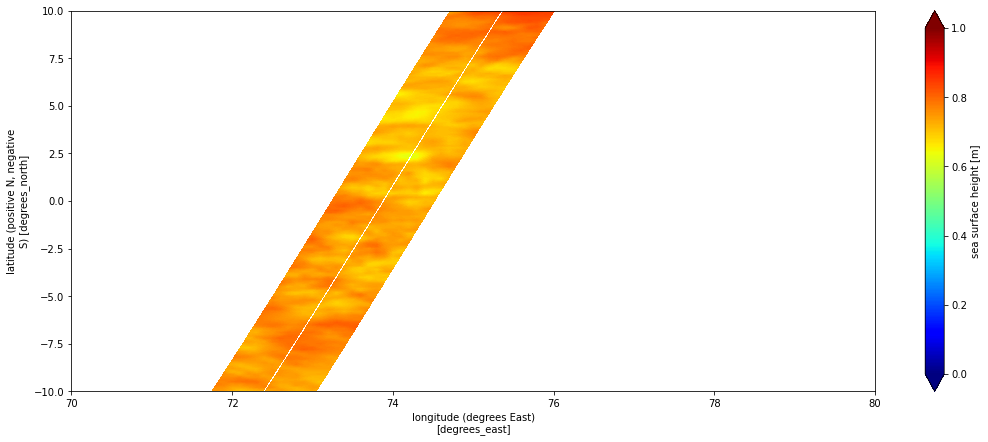

In [11]:
sla.plot(x="longitude", y="latitude", cmap="jet", figsize=(18,7), vmin=0, vmax=1)
plt.xlim(70, 80)
plt.ylim(-10, 10)
plt.show()

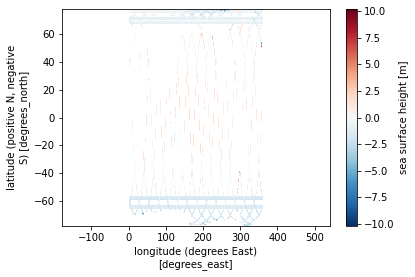

In [8]:
sla.plot(x="longitude", y="latitude")

In [1]:
%%capture
import requests

def store_aws_keys(endpoint: str="https://archive.podaac.earthdata.nasa.gov/s3credentials"):    
    with requests.get(endpoint, "w") as r:
        accessKeyId, secretAccessKey, sessionToken, expiration = list(r.json().values())
    %set_env AWS_ACCESS_KEY_ID=$accessKeyId
    %set_env AWS_SECRET_ACCESS_KEY=$secretAccessKey
    %set_env AWS_SESSION_TOKEN=$sessionToken
    return expiration

exp = store_aws_keys()



In [2]:
urls = [
    's3://podaac-ops-cumulus-protected/VIIRS_NPP-OSPO-L2P-v2.61/20211021095000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
    's3://podaac-ops-cumulus-protected/VIIRS_NPP-OSPO-L2P-v2.61/20211021113000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
    's3://podaac-ops-cumulus-protected/VIIRS_NPP-OSPO-L2P-v2.61/20211021131000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
    's3://podaac-ops-cumulus-protected/VIIRS_NPP-OSPO-L2P-v2.61/20211021193000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
    's3://podaac-ops-cumulus-protected/VIIRS_NPP-OSPO-L2P-v2.61/20211021211000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
    's3://podaac-ops-cumulus-protected/VIIRS_NPP-OSPO-L2P-v2.61/20211021212000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
    's3://podaac-ops-cumulus-protected/VIIRS_NPP-OSPO-L2P-v2.61/20211022093000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
]

'2021-11-18 22:45:49+00:00'

In [4]:
for u in urls:
    !aws s3 cp $u .

download: s3://podaac-ops-cumulus-protected/VIIRS_NPP-OSPO-L2P-v2.61/20211021095000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc to ./20211021095000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc
download: s3://podaac-ops-cumulus-protected/VIIRS_NPP-OSPO-L2P-v2.61/20211021113000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc to ./20211021113000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc
download: s3://podaac-ops-cumulus-protected/VIIRS_NPP-OSPO-L2P-v2.61/20211021131000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc to ./20211021131000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc
download: s3://podaac-ops-cumulus-protected/VIIRS_NPP-OSPO-L2P-v2.61/20211021193000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc to ./20211021193000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc
download: s3://podaac-ops-cumulus-protected/VIIRS_NPP-OSPO-L2P-v

In [20]:
files=!ls *.nc

files[0]

'20211021095000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc'

In [6]:
!ls *.nc

20211021095000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc
20211021113000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc
20211021131000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc
20211021193000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc
20211021211000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc
20211021212000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc
20211022093000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc


In [33]:
import os
import s3fs
import requests
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

def begin_s3_direct_access(url: str="https://archive.podaac.earthdata.nasa.gov/s3credentials"):
    response = requests.get(url).json()
    return s3fs.S3FileSystem(key=response['accessKeyId'],
                             secret=response['secretAccessKey'],
                             token=response['sessionToken'],
                             client_kwargs={'region_name':'us-west-2'})

fs = begin_s3_direct_access()

type(fs)

s3fs.core.S3FileSystem

In [34]:
urls = [
    's3://podaac-ops-cumulus-protected/VIIRS_NPP-OSPO-L2P-v2.61/20211021095000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
    's3://podaac-ops-cumulus-protected/VIIRS_NPP-OSPO-L2P-v2.61/20211021113000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
    's3://podaac-ops-cumulus-protected/VIIRS_NPP-OSPO-L2P-v2.61/20211021131000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
    's3://podaac-ops-cumulus-protected/VIIRS_NPP-OSPO-L2P-v2.61/20211021193000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
    's3://podaac-ops-cumulus-protected/VIIRS_NPP-OSPO-L2P-v2.61/20211021211000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
    's3://podaac-ops-cumulus-protected/VIIRS_NPP-OSPO-L2P-v2.61/20211021212000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
    's3://podaac-ops-cumulus-protected/VIIRS_NPP-OSPO-L2P-v2.61/20211022093000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
]

d = xr.open_dataset(fs.open(urls[0]))

d

<xarray.Dataset>
Dimensions:                       (time: 1, nj: 5408, ni: 3200)
Coordinates:
  * time                          (time) datetime64[ns] 2021-10-21T09:50:00
    lat                           (nj, ni) float32 ...
    lon                           (nj, ni) float32 ...
Dimensions without coordinates: nj, ni
Data variables: (12/14)
    sst_dtime                     (time, nj, ni) timedelta64[ns] ...
    dt_analysis                   (time, nj, ni) float32 ...
    satellite_zenith_angle        (time, nj, ni) float32 ...
    sea_surface_temperature       (time, nj, ni) float32 ...
    sses_bias                     (time, nj, ni) float32 ...
    sses_standard_deviation       (time, nj, ni) float32 ...
    ...                            ...
    quality_level                 (time, nj, ni) float32 ...
    wind_speed                    (time, nj, ni) float32 ...
    brightness_temperature_11um   (time, nj, ni) float32 ...
    brightness_temperature_12um   (time, nj, ni) float32 ...
    brightness_temperature_4um    (time, nj, ni) float32 ...
    brightness_temperature_08um6  (time, nj, ni) float32 ...
Attributes: (12/60)
    geospatial_bounds:                        POLYGON((-139.625  29.224, -139...
    geospatial_first_scanline_first_fov_lat:  [63.687595]
    geospatial_first_scanline_first_fov_lon:  [-139.95482]
    geospatial_first_scanline_last_fov_lat:   [55.430443]
    geospatial_first_scanline_last_fov_lon:   [-85.61858]
    geospatial_last_scanline_first_fov_lat:   [29.224136]
    ...                                       ...
    time_coverage_end:                        20211021T100000Z
    time_coverage_start:                      20211021T095000Z
    title:                                    VIIRS L2P SST
    uuid:                                     baf94f2e-3267-11ec-b27b-eb84524...
    westernmost_longitude:                    [-139.95482]
    netcdf_version_id:                        4.5.0 of Jul 20 2018 12:34:15 $

<xarray.Dataset>
Dimensions:                       (nj: 5408, ni: 3200)
Coordinates:
    time                          datetime64[ns] 2021-10-21T09:50:00
Dimensions without coordinates: nj, ni
Data variables: (12/16)
    sst_dtime                     (nj, ni) timedelta64[ns] ...
    dt_analysis                   (nj, ni) float32 ...
    lat                           (nj, ni) float32 ...
    lon                           (nj, ni) float32 ...
    satellite_zenith_angle        (nj, ni) float32 ...
    sea_surface_temperature       (nj, ni) float32 ...
    ...                            ...
    quality_level                 (nj, ni) float32 ...
    wind_speed                    (nj, ni) float32 ...
    brightness_temperature_11um   (nj, ni) float32 ...
    brightness_temperature_12um   (nj, ni) float32 ...
    brightness_temperature_4um    (nj, ni) float32 ...
    brightness_temperature_08um6  (nj, ni) float32 ...
Attributes: (12/60)
    geospatial_bounds:                        POLYGON((-139.625  29.224, -139...
    geospatial_first_scanline_first_fov_lat:  [63.687595]
    geospatial_first_scanline_first_fov_lon:  [-139.95482]
    geospatial_first_scanline_last_fov_lat:   [55.430443]
    geospatial_first_scanline_last_fov_lon:   [-85.61858]
    geospatial_last_scanline_first_fov_lat:   [29.224136]
    ...                                       ...
    time_coverage_end:                        20211021T100000Z
    time_coverage_start:                      20211021T095000Z
    title:                                    VIIRS L2P SST
    uuid:                                     baf94f2e-3267-11ec-b27b-eb84524...
    westernmost_longitude:                    [-139.95482]
    netcdf_version_id:                        4.5.0 of Jul 20 2018 12:34:15 $

In [35]:
help(xr.open_dataset)

Help on function open_dataset in module xarray.backends.api:

open_dataset(filename_or_obj, *args, engine=None, chunks=None, cache=None, decode_cf=None, mask_and_scale=None, decode_times=None, decode_timedelta=None, use_cftime=None, concat_characters=None, decode_coords=None, drop_variables=None, backend_kwargs=None, **kwargs)
    Open and decode a dataset from a file or file-like object.
    
    Parameters
    ----------
    filename_or_obj : str, Path, file-like or DataStore
        Strings and Path objects are interpreted as a path to a netCDF file
        or an OpenDAP URL and opened with python-netCDF4, unless the filename
        ends with .gz, in which case the file is gunzipped and opened with
        scipy.io.netcdf (only netCDF3 supported). Byte-strings or file-like
        objects are opened by scipy.io.netcdf (netCDF3) or h5py (netCDF4/HDF).
    engine : {"netcdf4", "scipy", "pydap", "h5netcdf", "pynio", "cfgrib",         "pseudonetcdf", "zarr"} or subclass of xarray.backe

In [ ]:
variables = [
    #'time',
    #'sst_dtime',
    'dt_analysis',
    'satellite_zenith_angle',
    #'sea_surface_temperature',
    'sses_bias',
    'sses_standard_deviation',
    'sea_ice_fraction',
    #'l2p_flags',
    #'quality_level',
    #'wind_speed',
    'brightness_temperature_11um',
    'brightness_temperature_12um',
    'brightness_temperature_4um',
    'brightness_temperature_08um6',
]

In [64]:
# import os
# import s3fs
# import requests
# import numpy as np
# import xarray as xr
# import matplotlib.pyplot as plt

# urls = [
#     's3://podaac-ops-cumulus-protected/VIIRS_NPP-OSPO-L2P-v2.61/20211021095000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
#     's3://podaac-ops-cumulus-protected/VIIRS_NPP-OSPO-L2P-v2.61/20211021113000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
#     's3://podaac-ops-cumulus-protected/VIIRS_NPP-OSPO-L2P-v2.61/20211021131000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
#     's3://podaac-ops-cumulus-protected/VIIRS_NPP-OSPO-L2P-v2.61/20211021193000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
#     's3://podaac-ops-cumulus-protected/VIIRS_NPP-OSPO-L2P-v2.61/20211021211000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
#     's3://podaac-ops-cumulus-protected/VIIRS_NPP-OSPO-L2P-v2.61/20211021212000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
#     's3://podaac-ops-cumulus-protected/VIIRS_NPP-OSPO-L2P-v2.61/20211022093000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
# ]

# def begin_s3_direct_access(url: str="https://archive.podaac.earthdata.nasa.gov/s3credentials"):
#     response = requests.get(url).json()
#     return s3fs.S3FileSystem(key=response['accessKeyId'],
#                              secret=response['secretAccessKey'],
#                              token=response['sessionToken'],
#                              client_kwargs={'region_name':'us-west-2'})

# def fx(x):
#     return x.isel(time=0)
#     #return x.reset_coords().isel(time=0)

# def _open_mfdataset(urls, dim, func=None):
    
#     def _open_dataset(x):
#         x = 
#         with xr.open_dataset(x) as ds:
#             if func is not None:
#                 ds = func(ds)
#             return ds.load()

#     fs = begin_s3_direct_access()
#     files = [fs.open(u) for u in urls]
#     data = [_open_dataset(f) for f in sorted(urls)]
#     return data
#     #return xr.concat(data, dim)



# combined = _open_mfdataset(urls, "time", fx)

# combined

In [62]:
def _open_dataset(x):
    with xr.open_dataset(x, engine="h5netcdf") as ds:
        if fx is not None:
            ds = fx(ds)
        return ds.load()

#fs = begin_s3_direct_access()
#files = [fs.open(u) for u in sorted(urls)]
#data = [_open_dataset(f) for f in files]

#return xr.concat(data, dim)

<xarray.Dataset>
Dimensions:                       (nj: 5408, ni: 3200)
Coordinates:
    time                          datetime64[ns] 2021-10-21T09:50:00
    lat                           (nj, ni) float32 63.69 63.69 ... 24.53 24.52
    lon                           (nj, ni) float32 -140.0 -139.9 ... -109.1
Dimensions without coordinates: nj, ni
Data variables: (12/14)
    sst_dtime                     (nj, ni) timedelta64[ns] 00:00:00 ... 00:10...
    dt_analysis                   (nj, ni) float32 nan nan nan ... -3.7 -3.2
    satellite_zenith_angle        (nj, ni) float32 70.0 70.0 ... -70.0 -70.0
    sea_surface_temperature       (nj, ni) float32 nan nan nan ... 299.1 299.7
    sses_bias                     (nj, ni) float32 nan nan nan ... -0.896 -0.736
    sses_standard_deviation       (nj, ni) float32 nan nan nan ... 0.27 0.27
    ...                            ...
    quality_level                 (nj, ni) float32 1.0 1.0 1.0 ... 1.0 1.0 1.0
    wind_speed                    (nj, ni) float32 0.6 0.6 0.6 ... 7.05 7.2 7.2
    brightness_temperature_11um   (nj, ni) float32 266.9 266.9 ... 291.7 291.9
    brightness_temperature_12um   (nj, ni) float32 267.1 267.1 ... 290.3 290.4
    brightness_temperature_4um    (nj, ni) float32 267.8 267.8 ... 293.0 293.4
    brightness_temperature_08um6  (nj, ni) float32 264.3 264.3 ... 286.4 286.7
Attributes: (12/60)
    geospatial_bounds:                        POLYGON((-139.625  29.224, -139...
    geospatial_first_scanline_first_fov_lat:  [63.687595]
    geospatial_first_scanline_first_fov_lon:  [-139.95482]
    geospatial_first_scanline_last_fov_lat:   [55.430443]
    geospatial_first_scanline_last_fov_lon:   [-85.61858]
    geospatial_last_scanline_first_fov_lat:   [29.224136]
    ...                                       ...
    time_coverage_end:                        20211021T100000Z
    time_coverage_start:                      20211021T095000Z
    title:                                    VIIRS L2P SST
    uuid:                                     baf94f2e-3267-11ec-b27b-eb84524...
    westernmost_longitude:                    [-139.95482]
    netcdf_version_id:                        4.5.0 of Jul 20 2018 12:34:15 $

In [66]:
ds = xr.concat(data, "time", compat="override", data_vars="minimal")

ValueError: arguments without labels along dimension 'nj' cannot be aligned because they have different dimension sizes: {5408, 5392}

In [69]:
files=!ls *.nc

files

['20211021095000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
 '20211021113000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
 '20211021131000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
 '20211021193000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
 '20211021211000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
 '20211021212000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc',
 '20211022093000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc']

In [76]:
def modify(ds):
    # modify ds here
    return ds

import dask

# Here's what `xarray.open_mfdataset` does under the hood:
open_kwargs = dict(decode_cf=True, decode_times=False)
open_tasks = [dask.delayed(xr.open_dataset)(f, **open_kwargs) for f in files]
tasks = [dask.delayed(modify)(task) for task in open_tasks]
datasets = dask.compute(tasks)  # get a list of xarray.Datasets
combined = xr.combine_by_coords(datasets)  # or some combination of concat, merge

combined

ValueError: arguments without labels along dimension 'nj' cannot be aligned because they have different dimension sizes: {5392, 5408}

In [78]:
help(xr.align)

Help on function align in module xarray.core.alignment:

align(*objects: 'DataAlignable', join='inner', copy=True, indexes=None, exclude=frozenset(), fill_value=<NA>) -> Tuple[ForwardRef('DataAlignable'), ...]
    Given any number of Dataset and/or DataArray objects, returns new
    objects with aligned indexes and dimension sizes.
    
    Array from the aligned objects are suitable as input to mathematical
    operators, because along each dimension they have the same index and size.
    
    Missing values (if ``join != 'inner'``) are filled with ``fill_value``.
    The default fill value is NaN.
    
    Parameters
    ----------
    *objects : Dataset or DataArray
        Objects to align.
    join : {"outer", "inner", "left", "right", "exact", "override"}, optional
        Method for joining the indexes of the passed objects along each
        dimension:
    
        - "outer": use the union of object indexes
        - "inner": use the intersection of object indexes
        - "le

In [141]:
data[1]

<xarray.Dataset>
Dimensions:                       (nj: 5392, ni: 3200)
Coordinates:
    time                          datetime64[ns] 2021-10-21T11:30:02
    lat                           (nj, ni) float32 68.67 68.67 ... 29.49 29.48
    lon                           (nj, ni) float32 -167.2 -167.2 ... -132.4
Dimensions without coordinates: nj, ni
Data variables: (12/14)
    sst_dtime                     (nj, ni) timedelta64[ns] 00:00:00 ... 00:09...
    dt_analysis                   (nj, ni) float32 nan nan nan ... -0.3 -1.2
    satellite_zenith_angle        (nj, ni) float32 70.0 70.0 ... -70.0 -70.0
    sea_surface_temperature       (nj, ni) float32 248.0 247.9 ... 293.0 292.1
    sses_bias                     (nj, ni) float32 -2.032 -2.032 ... 0.048 0.144
    sses_standard_deviation       (nj, ni) float32 0.36 0.36 0.36 ... 0.33 0.3
    ...                            ...
    quality_level                 (nj, ni) float32 1.0 1.0 1.0 ... 1.0 1.0 1.0
    wind_speed                    (nj, ni) float32 9.75 9.75 9.6 ... 9.45 9.45
    brightness_temperature_11um   (nj, ni) float32 248.8 248.7 ... 279.3 282.8
    brightness_temperature_12um   (nj, ni) float32 249.0 248.9 ... 276.3 281.0
    brightness_temperature_4um    (nj, ni) float32 247.8 247.7 ... 285.5 286.2
    brightness_temperature_08um6  (nj, ni) float32 246.0 246.1 ... 276.7 279.4
Attributes: (12/60)
    geospatial_bounds:                        POLYGON((-164.445  34.422, -167...
    geospatial_first_scanline_first_fov_lat:  [68.67115]
    geospatial_first_scanline_first_fov_lon:  [-167.22006]
    geospatial_first_scanline_last_fov_lat:   [59.159492]
    geospatial_first_scanline_last_fov_lon:   [-104.25411]
    geospatial_last_scanline_first_fov_lat:   [34.42216]
    ...                                       ...
    time_coverage_end:                        20211021T114000Z
    time_coverage_start:                      20211021T113001Z
    title:                                    VIIRS L2P SST
    uuid:                                     21c13650-3276-11ec-9ffe-438f729...
    westernmost_longitude:                    [-167.22006]
    netcdf_version_id:                        4.5.0 of Jul 20 2018 12:34:15 $

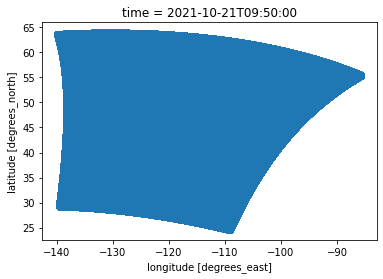

In [108]:
data[0].plot.scatter(x="lon", y="lat", hue="sea_surface_temperature")

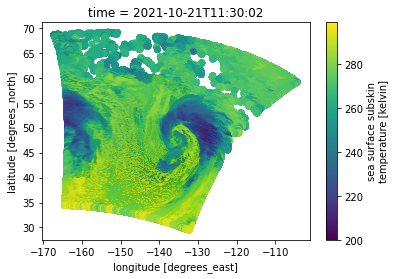

In [111]:
data[1].plot.scatter(x="lon", y="lat", hue="sea_surface_temperature")

## Best Practices for Remapping Level 2 Data to a Fixed Grid

https://podaac-tools.jpl.nasa.gov/drive/files/OceanTemperature/ghrsst/docs/GDS20r5.pdf

The remapping procedure consists in remapping the original L2P in swath projection onto a fixed grid. 
This  remapping  should  preserve  the  traceability  of  the  SST  at  pixel  level  and  keep  the  best  quality 
data.  
 
If  the  original  and  final  grid  resolutions  are  similar,  the  nearest  pixel  remapping  should  be 
adopted.    To  do  so,  either  a  “source  to  target”  or  a  “target  to  source”  approach  may  be  used.  The 
latter, target to source, which consists in scanning the target grid points to find the nearest pixel in the 
source, is recommended since it avoids creating holes in the remapped field.  
 
If the original grid resolution is finer than the output grid, (Figure 10-1) an averaging procedure 
can be adopted. For these cases the best practice is to average the values of all pixels which overlap 
the product cell entirely and which have a L2P confidence record quality_level value equal to the 
highest encountered within the cell, to produce a single value. 

In [143]:
ds = xr.open_dataset(files[0], decode_coords=True)

help(ds.sea_surface_temperature.resample)# (nj=5392)

Help on method resample in module xarray.core.common:

resample(indexer: 'Mapping[Any, str]' = None, skipna=None, closed: 'str' = None, label: 'str' = None, base: 'int' = 0, keep_attrs: 'bool' = None, loffset=None, restore_coord_dims: 'bool' = None, **indexer_kwargs: 'str') method of xarray.core.dataarray.DataArray instance
    Returns a Resample object for performing resampling operations.
    
    Handles both downsampling and upsampling. The resampled
    dimension must be a datetime-like coordinate. If any intervals
    contain no values from the original object, they will be given
    the value ``NaN``.
    
    Parameters
    ----------
    indexer : {dim: freq}, optional
        Mapping from the dimension name to resample frequency [1]_. The
        dimension must be datetime-like.
    skipna : bool, optional
        Whether to skip missing values when aggregating in downsampling.
    closed : {"left", "right"}, optional
        Side of each interval to treat as closed.
    labe

In [87]:
for d in data:
    print(d.sea_surface_temperature.data.shape)

(5408, 3200)
(5392, 3200)
(5392, 3200)
(5392, 3200)
(5392, 3200)
(5408, 3200)
(5392, 3200)


The Recommended GHRSST Data Specification (GDS) 
version 2.0 revision 5 
 
 Filename: GDS20r5.doc 
Page 100 of 123  Last saved on: 09/10/2012 12:40:00 UTC 
 
Figure 10-1 To illustrate the approach when the L3 product output grid is over-sampled by the 
L2P input data.  All pixels labelled p in the input data are possible contributors to the value for 
new cell A.  
 
The following practices are recommended by the GDS: 
 
• 1) In the case of a smaller L2P input pixel than the grid cell size, L3 data product cell values 
are  derived  from  an average  of  the  L2P  pixel  which  completely  overlap  the  product  cell  and 
which  have  a  L2P  quality  record  quality_level  value  equal  to  the  highest  encountered 
within the cell, to produce a single value. 
• 2) For input pixels that straddle the boundary between output grid cells, a weighting function 
may be applied to the input values according to the degree of coverage of the output grid cell 
and according to the SSES. 
• 3)  Only  the  best  quality  original  data  within  a  grid  cell  should  be  averaged  to  produce  the 
resulting  SST  value,  to  preserve  the  homogeneity  of  the  SST  quality  (recommendation  1 
above). In the case of averaging, the number of contributors can be recorded as well as the 
sum of the SST values and the sum of the square values of the SST. The SSES and ancillary 
data (if needed, for instance if there may be more that one SSES couple of values (bias and 
standard  deviation)  by  quality  level)  must  be  averaged  accordingly:    the  sses_bias  values 
are  averaged  similarly  as  the  SST  values,  the  new  sses_standard_deviation  value  is 
the square root of the averaged squared values of the contributing 
sses_standard_deviations. The averaging should account for the nature of the original 
l2p_flags. 
• 4) In the case of a larger pixel than the L3 grid cell size, 2 approaches can be adopted: 
1. The value of the L2P pixel is allocated to the grid cell the closest to the pixel centre. 
2. The  output  grid  cell  takes  the  value  of  the  L2P  pixel  in  which  its  centre  lies.  In  this 
case  the  original  latitudes  and  longitudes  of  the  pixel  must  be  recorded,  to  be 
able to detect where the original L2P pixel value has been duplicated.    
 
If the original grid resolution is larger than the output grid (e.g., microwave instruments), as 
illustrated in Figure 10-2, the following practices are recommended by the GDS: 

In [147]:
ds0 = data[0].sea_surface_temperature
ds1 = data[1].sea_surface_temperature

xr.combine_by_coords([ds0, ds1], dims=['nj', 'ni'])

TypeError: combine_by_coords() got an unexpected keyword argument 'dims'

In [137]:
# Create the merge file:
with xr.open_dataset('./merged.nc', mode="r") as out:

    src, tgt = ds0.shape[0], ds1.shape[0]

    ds0.resize(src+tgt, axis=0)
    ds0[ds0:] = ds1[:]
    
    print(out)

FileNotFoundError: [Errno 2] No such file or directory: b'/home/jovyan/shared/Project1/merged.nc'

In [ ]:
combine_first

In [129]:
help(np.squeeze)

Help on function squeeze in module numpy:

squeeze(a, axis=None)
    Remove axes of length one from `a`.
    
    Parameters
    ----------
    a : array_like
        Input data.
    axis : None or int or tuple of ints, optional
        .. versionadded:: 1.7.0
    
        Selects a subset of the entries of length one in the
        shape. If an axis is selected with shape entry greater than
        one, an error is raised.
    
    Returns
    -------
    squeezed : ndarray
        The input array, but with all or a subset of the
        dimensions of length 1 removed. This is always `a` itself
        or a view into `a`. Note that if all axes are squeezed,
        the result is a 0d array and not a scalar.
    
    Raises
    ------
    ValueError
        If `axis` is not None, and an axis being squeezed is not of length 1
    
    See Also
    --------
    expand_dims : The inverse operation, adding entries of length one
    reshape : Insert, remove, and combine dimensions, and resi

In [127]:
#np.stack()

np.stack([d.lon.data.flatten() for d in data])

ValueError: all input arrays must have the same shape

In [126]:
data[0].lon.data

array([[-139.95482 , -139.92085 , -139.88696 , ...,  -85.65978 ,
         -85.639206,  -85.61858 ],
       [-139.95285 , -139.9189  , -139.88501 , ...,  -85.66723 ,
         -85.64665 ,  -85.62604 ],
       [-139.9509  , -139.91695 , -139.88307 , ...,  -85.674675,
         -85.6541  ,  -85.633484],
       ...,
       [-139.62355 , -139.60637 , -139.5892  , ..., -109.14695 ,
        -109.131294, -109.1156  ],
       [-139.62413 , -139.60695 , -139.58978 , ..., -109.1493  ,
        -109.13365 , -109.11796 ],
       [-139.62471 , -139.60753 , -139.59036 , ..., -109.15166 ,
        -109.136   , -109.12031 ]], dtype=float32)

In [115]:
def align_and_merge_arbitrary_input_datasets(
        datasets:            list,
        xres:                float=1.0,                                     
        yres:                float=1.0, 
        radius_of_influence: float=1.75e5, 
        sigmas:              float=25000,
        neighbours:          int=100,
        fill_value:          float=np.nan,
        uncert:              bool=True,
    ):

    # # Get the 'np.datetime' mean for 'time', also the midpoint of the cycle:
    # time = np.datetime64(da.coords['time'].mean().data)
    lons = da.coords['longitude'].values
    lats = da.coords['latitude'].values
    
    # Make a boolean array where True means 'ssha' is NOT equal to nan: 
    nans = ~np.isnan(da.values)
    
    # Ignore nans and validate the lats and lons arrays in two steps:
    if lats[nans].min() < -90. or lats[nans].max() > 90.:
        raise ValueError('Found latitudes exceeding -90, 90!')
    if lons[nans].min() < -180. or lons[nans].max() >= 180.:
        lons = (lons + 180) % 360 - 180
    source_grid = pr.SwathDefinition(lons[nans], lats[nans])
    
    # Set default target grid according to the source bounds and the target resolution:
    nlons = int((np.ceil(lons.max())-np.floor(lons.min()))/xres)
    tlons = np.linspace(np.floor(lons.min()), np.ceil(lons.max()), num=nlons)
    nlats = int((np.ceil(lats.max())-np.floor(lats.min()))/yres)
    tlats = np.linspace(np.floor(lats.min()), np.ceil(lats.max()), num=nlats)
    
    # Make pyresample objects to define the source and target swath/grid:
    target_grid = pr.SwathDefinition(*np.meshgrid(tlons, tlats))
    
    # Map the data variable to the target grid:
    grid = resample_gauss(source_geo_def      = source_grid,
                          data                = da.values[nans],
                          target_geo_def      = target_grid,
                          radius_of_influence = radius_of_influence,  
                          sigmas              = sigmas,
                          fill_value          = fill_value,
                          neighbours          = neighbours, )
    
    # Return the resulting grid as a new xr.DataArray:
    return xr.DataArray(grid, 
                        name=da.name, 
                        dims=['latitude', 'longitude'], 
                        coords={'time': time, 
                                'latitude': tlats,
                                'longitude': tlons, })

In [114]:
data[0].sea_surface_temperature.to_dataset()

<xarray.Dataset>
Dimensions:                  (nj: 5408, ni: 3200)
Coordinates:
    time                     datetime64[ns] 2021-10-21T09:50:00
    lat                      (nj, ni) float32 63.69 63.69 63.69 ... 24.53 24.52
    lon                      (nj, ni) float32 -140.0 -139.9 ... -109.1 -109.1
Dimensions without coordinates: nj, ni
Data variables:
    sea_surface_temperature  (nj, ni) float32 nan nan nan ... 299.8 299.1 299.7

In [113]:
xr.merge(, data[0].lat, data[0].lon)

TypeError: unhashable type: 'DataArray'

In [105]:
help(data[0].assign_coords)

dir(data[0])# .set_dims("lat")

Help on method assign_coords in module xarray.core.common:

assign_coords(coords=None, **coords_kwargs) method of xarray.core.dataset.Dataset instance
    Assign new coordinates to this object.
    
    Returns a new object with all the original data in addition to the new
    coordinates.
    
    Parameters
    ----------
    coords : dict, optional
        A dict where the keys are the names of the coordinates
        with the new values to assign. If the values are callable, they are
        computed on this object and assigned to new coordinate variables.
        If the values are not callable, (e.g. a ``DataArray``, scalar, or
        array), they are simply assigned. A new coordinate can also be
        defined and attached to an existing dimension using a tuple with
        the first element the dimension name and the second element the
        values for this new coordinate.
    **coords_kwargs : optional
        The keyword arguments form of ``coords``.
        One of ``coord

['Conventions',
 'Metadata_Conventions',
 '_HANDLED_TYPES',
 '__abs__',
 '__abstractmethods__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__copy__',
 '__dask_graph__',
 '__dask_keys__',
 '__dask_layers__',
 '__dask_optimize__',
 '__dask_postcompute__',
 '__dask_postpersist__',
 '__dask_scheduler__',
 '__dask_tokenize__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',

In [100]:
xr.concat(data, dim=['lons', 'lats'], join="outer")

ValueError: arguments without labels along dimension 'nj' cannot be aligned because they have different dimension sizes: {5408, 5392}

In [94]:
help(xr.combine_by_coords)

Help on function combine_by_coords in module xarray.core.combine:

combine_by_coords(data_objects: Sequence[Union[xarray.core.dataset.Dataset, xarray.core.dataarray.DataArray]] = [], compat: str = 'no_conflicts', data_vars: str = 'all', coords: str = 'different', fill_value: object = <NA>, join: str = 'outer', combine_attrs: str = 'no_conflicts', datasets: Sequence[xarray.core.dataset.Dataset] = None) -> Union[xarray.core.dataset.Dataset, xarray.core.dataarray.DataArray]
    Attempt to auto-magically combine the given datasets (or data arrays)
    into one by using dimension coordinates.
    
    This function attempts to combine a group of datasets along any number of
    dimensions into a single entity by inspecting coords and metadata and using
    a combination of concat and merge.
    
    Will attempt to order the datasets such that the values in their dimension
    coordinates are monotonic along all dimensions. If it cannot determine the
    order in which to concatenate the da

In [57]:
help(xr.concat)

Help on function concat in module xarray.core.concat:

concat(objs, dim, data_vars='all', coords='different', compat='equals', positions=None, fill_value=<NA>, join='outer', combine_attrs='override')
    Concatenate xarray objects along a new or existing dimension.
    
    Parameters
    ----------
    objs : sequence of Dataset and DataArray
        xarray objects to concatenate together. Each object is expected to
        consist of variables and coordinates with matching shapes except for
        along the concatenated dimension.
    dim : str or DataArray or pandas.Index
        Name of the dimension to concatenate along. This can either be a new
        dimension name, in which case it is added along axis=0, or an existing
        dimension name, in which case the location of the dimension is
        unchanged. If dimension is provided as a DataArray or Index, its name
        is used as the dimension to concatenate along and the values are added
        as a coordinate.
    data

In [49]:
fs = begin_s3_direct_access()

ds = xr.open_mfdataset(
    [fs.open(u) for u in urls[1:]],
    engine="h5netcdf",
    data_vars=['sea_surface_temperature'],
    combine="by_coords",
    compat="override",
    #concat_dim="time",
    #mask_and_scale=True,
    decode_cf=True,
)

ds

ValueError: arguments without labels along dimension 'nj' cannot be aligned because they have different dimension sizes: {5392, 5408}

In [46]:
help(xr.open_mfdataset)

Help on function open_mfdataset in module xarray.backends.api:

open_mfdataset(paths, chunks=None, concat_dim=None, compat='no_conflicts', preprocess=None, engine=None, data_vars='all', coords='different', combine='by_coords', parallel=False, join='outer', attrs_file=None, combine_attrs='override', **kwargs)
    Open multiple files as a single dataset.
    
    If combine='by_coords' then the function ``combine_by_coords`` is used to combine
    the datasets into one before returning the result, and if combine='nested' then
    ``combine_nested`` is used. The filepaths must be structured according to which
    combining function is used, the details of which are given in the documentation for
    ``combine_by_coords`` and ``combine_nested``. By default ``combine='by_coords'``
    will be used. Requires dask to be installed. See documentation for
    details on dask [1]_. Global attributes from the ``attrs_file`` are used
    for the combined dataset.
    
    Parameters
    ----------
